# 🌱Medicinal Plants: A Data-Driven Exploration🌱  

## 👋Hello! I'm Abhisek, currently diving into AI & DS. This notebook showcases an insightful EDA project where I explore how traditional medicinal plants relate to diseases, their benefits, and preparation methods using Python🐍

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
from IPython.display import display

In [4]:
# Load the dataset
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Brainovision/Python Basics/Pawan Sir/medicinal_plants.csv")

In [5]:
print("💊 Reveal the dataset:")
df.head(20)

💊 Reveal the dataset:


,Plant Name,Parts Used,Preparation Method,Medicinal Benefits,Diseases Treated,Plant Set
0,Tulsi (Holy Basil),Leaves,Boil leaves in water to make tea,"Boosts immunity, treats cold and flu",Common Cold,Set A
1,Neem,Leaves,Brew leaves or make paste,"Skin purification, anti-bacterial, skin infect...",Skin Diseases,Set B
2,Turmeric,Root,Grind to powder and mix with milk or water,"Anti-inflammatory, heals wounds, boosts immunity",Inflammation/Wounds,Set C
3,Ginger,Root,Boil in water or make paste,"Aids digestion, relieves nausea, reduces infla...",Digestion/Nausea,Set D
4,Amla (Indian Gooseberry),Fruit,Eat raw or juice it,"Rich in Vitamin C, boosts immunity, treats col...",Cold/Digestion,Set A
5,Ashwagandha,Root,Dried root powder with milk or water,"Relieves stress, improves stamina, reduces anx...",Stress/Anxiety,Set E
6,Peppermint,Leaves,Make herbal tea or extract,"Soothes stomach, relieves headaches and conges...",Headache/Cold,Set A
7,Aloe Vera,Leaf Gel,Apply gel or drink juice,"Heals burns, improves digestion, treats skin i...",Skin/Digestion,Set B
8,Giloy,Stem,Boil stem or make juice,"Improves immunity, treats fever and chronic il...",Fever/Immunity,Set A
9,Brahmi,Leaves,Crush to extract juice or boil in water,"Improves memory, treats anxiety and stress",Mental Health,Set E


In [6]:
# Display basic info
print("📊 Dataset Info:")
df.info()

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Plant Name          20 non-null     object
 1   Parts Used          20 non-null     object
 2   Preparation Method  20 non-null     object
 3   Medicinal Benefits  20 non-null     object
 4   Diseases Treated    20 non-null     object
 5   Plant Set           20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


# --- 🎯Exploratory Data Analysis (EDA) - Visualizations🎯 ---

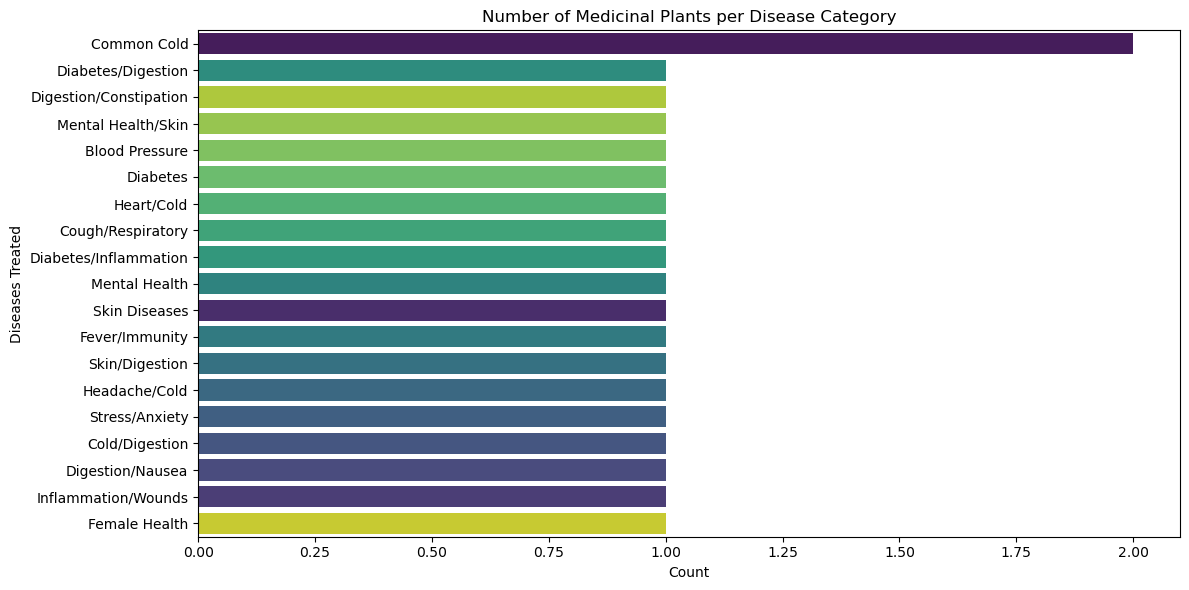

In [8]:
# 📌 1. Count of plants per disease category
plt.figure(figsize=(12, 6))
sns.countplot(y="Diseases Treated", data=df, order=df["Diseases Treated"].value_counts().index, hue="Diseases Treated", palette="viridis", dodge=False, legend=False)
plt.title("Number of Medicinal Plants per Disease Category")
plt.xlabel("Count")
plt.ylabel("Diseases Treated")
plt.tight_layout()
plt.show()

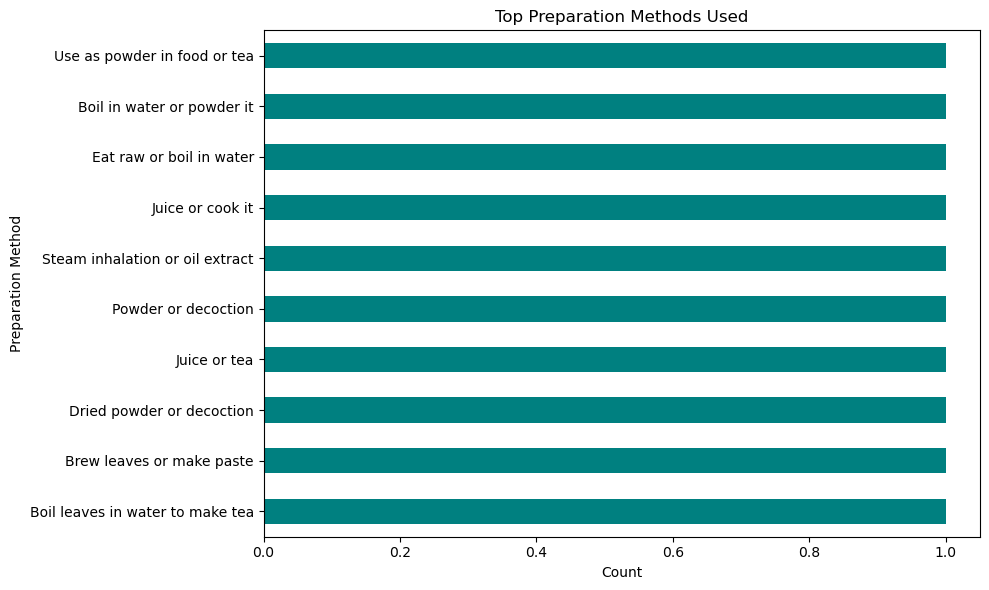

In [9]:
# 📌 2. Top 10 Preparation Methods
plt.figure(figsize=(10, 6))
df["Preparation Method"].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top Preparation Methods Used")
plt.xlabel("Count")
plt.ylabel("Preparation Method")
plt.tight_layout()
plt.show()

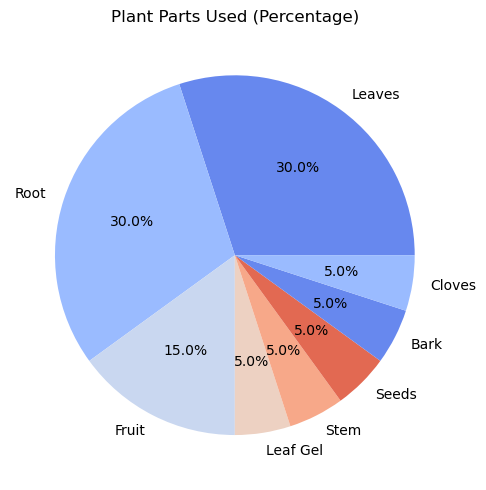

In [10]:
# 📌 3. Distribution of Parts Used
# Count parts used and calculate percentages
part_counts = df['Parts Used'].value_counts()
part_percent = (part_counts / part_counts.sum()) * 100

# Pie plot
plt.figure(figsize=(5, 5))
plt.pie(part_percent, labels=part_percent.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm"))
plt.title("Plant Parts Used (Percentage)")
plt.tight_layout()
plt.show()

In [11]:
# 📌 4. Plants used for each disease
# Group plants per disease
grouped = df.groupby("Diseases Treated")["Plant Name"].apply(lambda x: ", ".join(sorted(set(x)))).reset_index()
grouped.columns = ["Disease", "Plants Used"]

# Display as table
display(grouped)

,Disease,Plants Used
0,Blood Pressure,Sarpagandha
1,Cold/Digestion,Amla (Indian Gooseberry)
2,Common Cold,"Eucalyptus, Tulsi (Holy Basil)"
3,Cough/Respiratory,Licorice Root
4,Diabetes,Bitter Gourd
5,Diabetes/Digestion,Fenugreek
6,Diabetes/Inflammation,Cinnamon
7,Digestion/Constipation,Haritaki
8,Digestion/Nausea,Ginger
9,Female Health,Shatavari


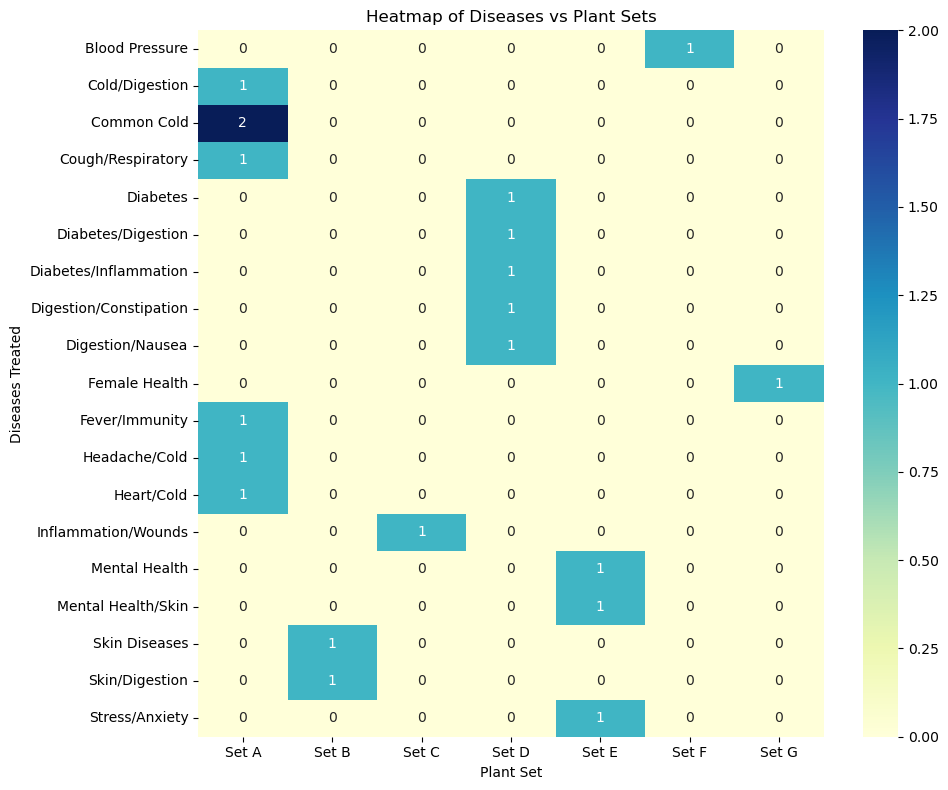

In [12]:
# 📌 5. Heatmap: Diseases vs Plant Set
pivot = pd.crosstab(df["Diseases Treated"], df["Plant Set"])
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Diseases vs Plant Sets")
plt.ylabel("Diseases Treated")
plt.xlabel("Plant Set")
plt.tight_layout()
plt.show()

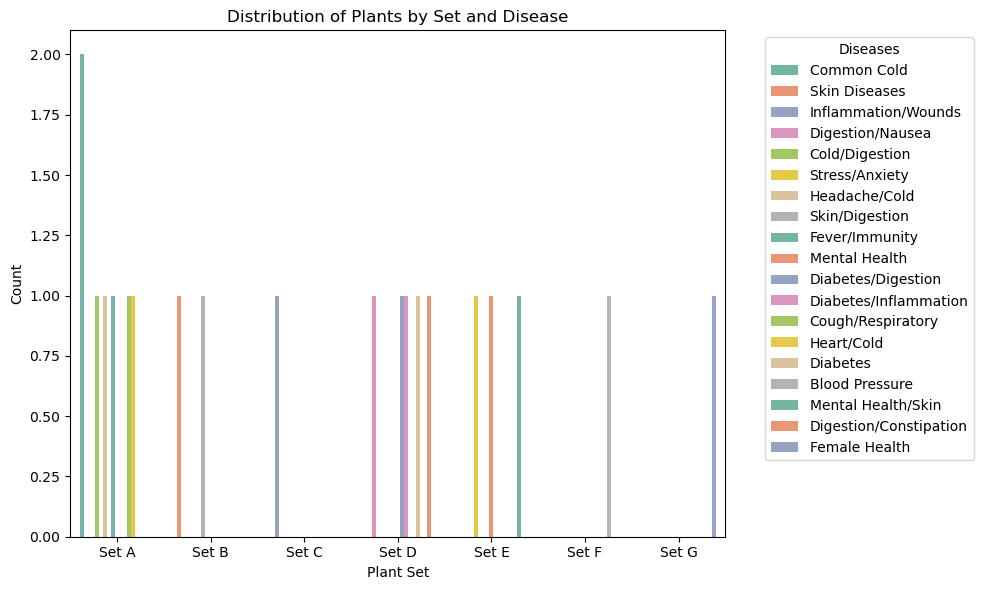

In [13]:
# 📌 6. Distribution of Plants by Set
plt.figure(figsize=(10, 6))
sns.countplot(x="Plant Set", data=df, hue="Diseases Treated", palette="Set2")
plt.title("Distribution of Plants by Set and Disease")
plt.xlabel("Plant Set")
plt.ylabel("Count")
plt.legend(title="Diseases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
# 📌 7. Unique Diseases Treated & Plant Diversity

unique_diseases = df["Diseases Treated"].nunique()
unique_plants = df["Plant Name"].nunique()

# Styled print
print("🚨" * 25)
print("🩺🌿 MEDICINAL PLANT DIVERSITY SUMMARY 🌿🩺".center(60, " "))
print("═" * 62)
print(f"🔬 Total Unique Diseases Treated  :  {unique_diseases}")
print(f"🌱 Total Unique Medicinal Plants  :  {unique_plants}")
print("═" * 62)
print("🚨" * 25)

🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨
          🩺🌿 MEDICINAL PLANT DIVERSITY SUMMARY 🌿🩺           
══════════════════════════════════════════════════════════════
🔬 Total Unique Diseases Treated  :  19
🌱 Total Unique Medicinal Plants  :  20
══════════════════════════════════════════════════════════════
🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨


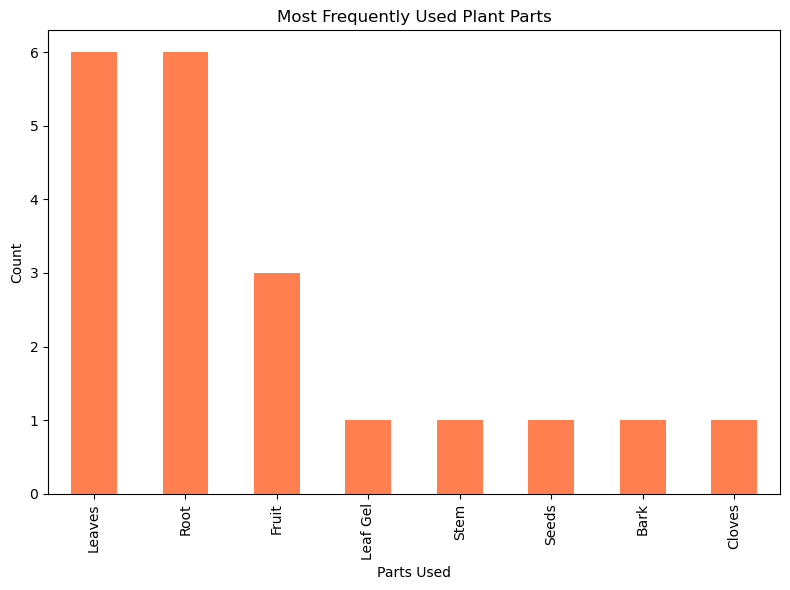

In [15]:
# 📌 8. Most Frequently Used Parts of Plants
plt.figure(figsize=(8, 6))
df['Parts Used'].value_counts().plot(kind='bar', color='coral')
plt.title("Most Frequently Used Plant Parts")
plt.ylabel("Count")
plt.xlabel("Parts Used")
plt.tight_layout()
plt.show()

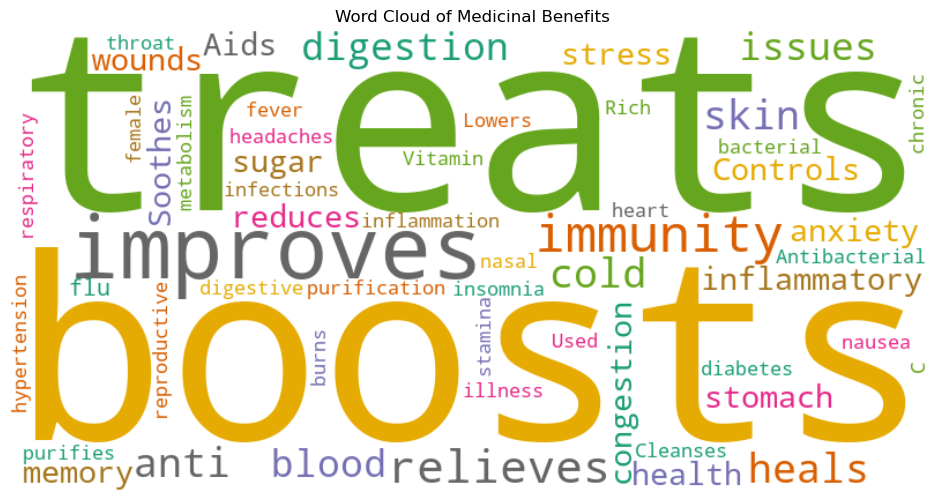

In [16]:
# 📌 9. Word Cloud: Medicinal Benefits
# Combine all benefits into one string
benefit_text = " ".join(df["Medicinal Benefits"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Dark2").generate(benefit_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Medicinal Benefits")
plt.show()

In [17]:
# 📌 10. Multi-disease Plants (Used for More Than One Purpose)
# Find how many plants are used for multiple conditions
multi_use = df["Diseases Treated"].value_counts()
multi_use = multi_use[multi_use > 1]
print("🚨" * 25)
print("🌿 Diseases with Multiple Medicinal Plants:")
print("-" * 45)
print(multi_use)
print("🚨" * 25)

🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨
🌿 Diseases with Multiple Medicinal Plants:
---------------------------------------------
Diseases Treated
Common Cold    2
Name: count, dtype: int64
🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨


In [18]:
# Reverse: Plants that are mentioned under multiple conditions (in case of duplicates or extended dataset)
duplicated_plants = df[df.duplicated(["Plant Name"], keep=False)]
print("🚨" * 25)
print("🔁 Plants used for multiple disease entries:")
print("-" * 45)
print(duplicated_plants[["Plant Name", "Diseases Treated"]])
print("🚨" * 25)

🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨
🔁 Plants used for multiple disease entries:
---------------------------------------------
Empty DataFrame
Columns: [Plant Name, Diseases Treated]
Index: []
🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨🚨


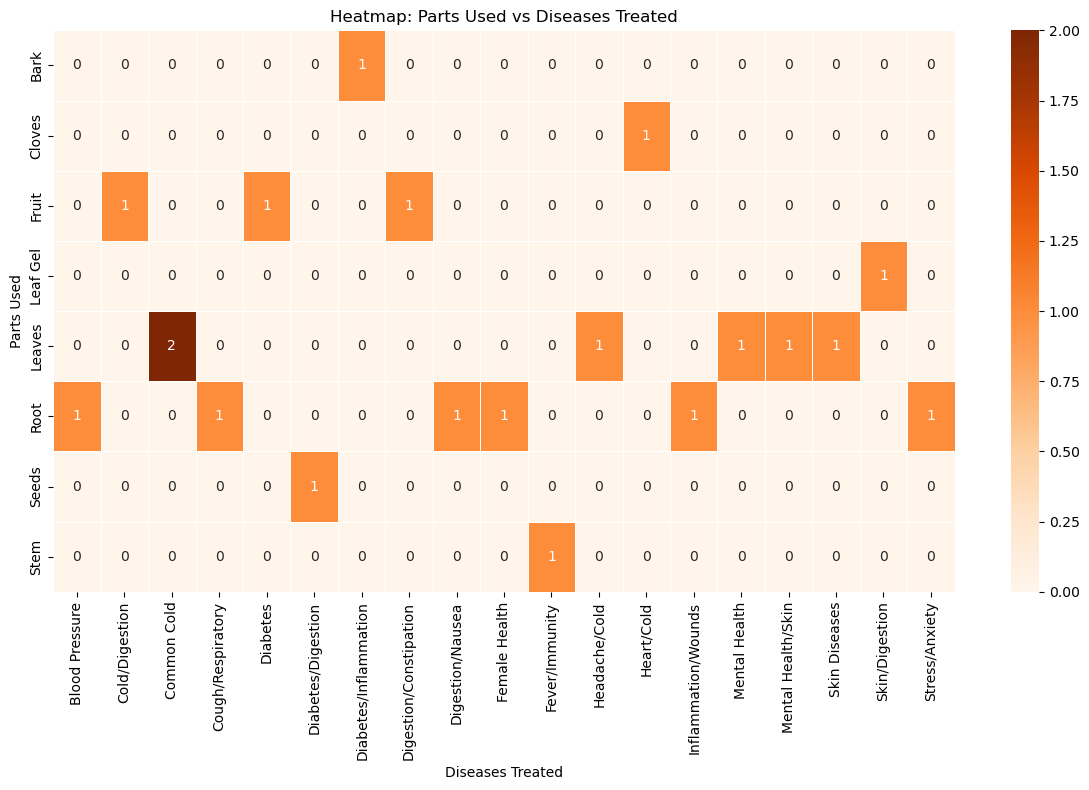

In [19]:
# 📌 11. Heatmap of Parts Used vs Disease Treated
pivot_parts_diseases = pd.crosstab(df["Parts Used"], df["Diseases Treated"])
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_parts_diseases, cmap="Oranges", linewidths=0.5, annot=True, fmt="d")
plt.title("Heatmap: Parts Used vs Diseases Treated")
plt.xlabel("Diseases Treated")
plt.ylabel("Parts Used")
plt.tight_layout()
plt.show()

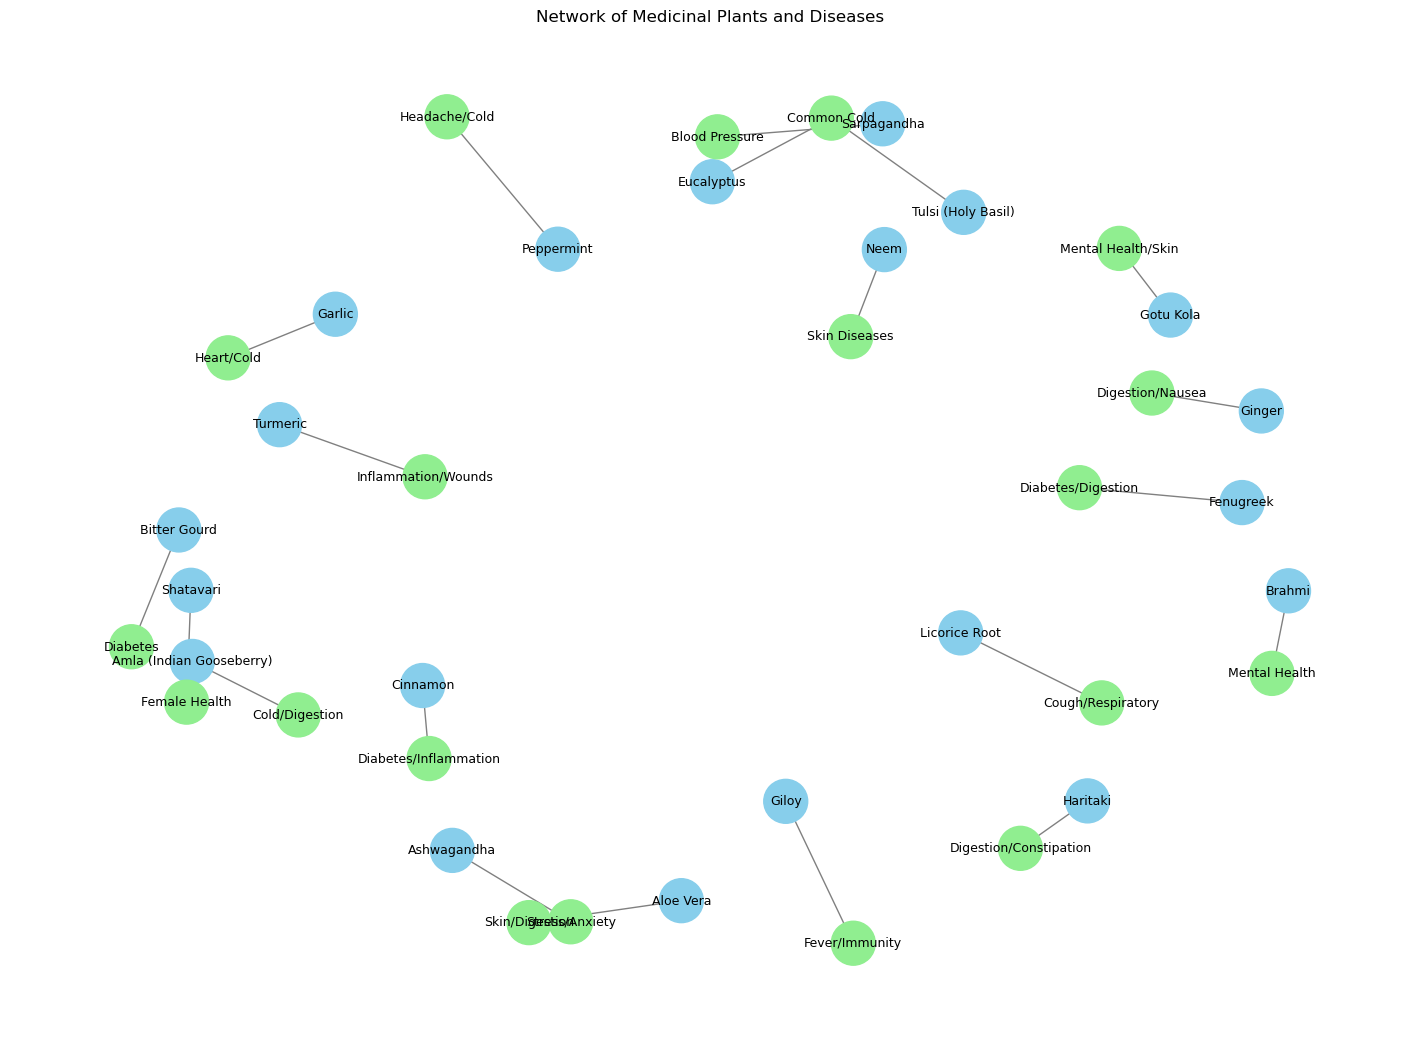

In [20]:
# 📌 12. Network Graph (Requires NetworkX)
# Create graph
G = nx.Graph()

# Add edges between plants and diseases
for _, row in df.iterrows():
    G.add_node(row['Plant Name'], type='plant')
    G.add_node(row['Diseases Treated'], type='disease')
    G.add_edge(row['Plant Name'], row['Diseases Treated'])

# Draw the network
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)
node_colors = ['skyblue' if G.nodes[node]['type'] == 'plant' else 'lightgreen' for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=1000, font_size=9)
plt.title("Network of Medicinal Plants and Diseases")
plt.show()

In [21]:
# 📌 13. # Define function to find plants for a given disease
# Define the function
def find_plant_by_disease():
    disease_name = input("🔍 Enter the disease name: ").strip().lower()
    matches = df[df["Diseases Treated"].str.lower() == disease_name]
    
    if matches.empty:
        print(f"\n❌ No match found for disease: '{disease_name}'")
    else:
        print(f"\n🩺 Disease Treated: {disease_name.title()}\n")
        for _, row in matches.iterrows():
            print(f"🌿 Plant Name             : {row['Plant Name']}")
            print(f"🌿 Part Used              : {row['Parts Used']}")
            print(f"🧪 Preparation Method     : {row['Preparation Method']}")
            print(f"💡 Medicinal Benefit      : {row['Medicinal Benefits']}")
            print("*" * 65)

find_plant_by_disease()

🔍 Enter the disease name:  common cold



🩺 Disease Treated: Common Cold

🌿 Plant Name             : Tulsi (Holy Basil)
🌿 Part Used              : Leaves
🧪 Preparation Method     : Boil leaves in water to make tea
💡 Medicinal Benefit      : Boosts immunity, treats cold and flu
*****************************************************************
🌿 Plant Name             : Eucalyptus
🌿 Part Used              : Leaves
🧪 Preparation Method     : Steam inhalation or oil extract
💡 Medicinal Benefit      : Relieves cold and nasal congestion
*****************************************************************


### ✅ Summary
#### 1. Created a mini medicinal plant recommendation system 🌿
#### 2. Visualized patterns in diseases and plant parts 🧠
#### 3. Used clean and readable code for analysis 📊

#### 🙌 Follow for more real-world AI+Data projects! 